# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [4]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable


In [5]:
from torchvision import datasets
from torch.utils.data import DataLoader

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts the images to tensor format
    transforms.Normalize((0.5,), (0.5,))  # Normalizes the images to [-1, 1] range
])

# Create training set and define training dataloader
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Create test set and define test dataloader
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**In this project, we applied the following preprocessing steps:**

1. **Conversion to Tensor:** We used the ToTensor() transform to convert the images from PIL format to PyTorch tensors. This step is essential because PyTorch models require input data to be in tensor format.

2. **Normalization:** We normalized the images using Normalize((0.5,), (0.5,)), which scales the pixel values to a range of [-1, 1]. Normalization helps in speeding up the convergence of the neural network during training and ensures that the model learns more effectively by having a consistent range of input values.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

1


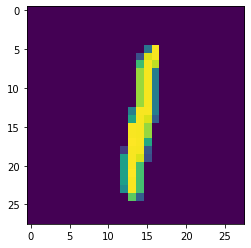

9


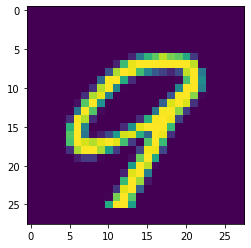

0


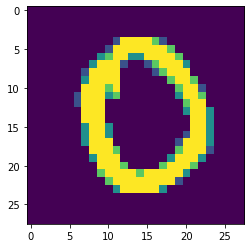

8


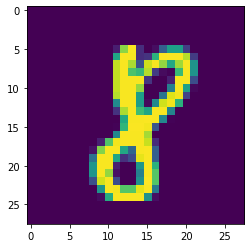

4


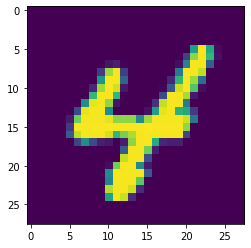

In [7]:
# Explore data
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [8]:
# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input size is 28x28 (flattened), output size is 128
        self.fc2 = nn.Linear(128, 64)  # Input size is 128, output size is 64
        self.fc3 = nn.Linear(64, 10)  # Input size is 64, output size is 10 (number of classes)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [9]:
net = Net()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [10]:
# Set device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move the model and data to the selected device
net = net.to(device)

# Training loop
num_epochs = 10
train_losses = []
val_losses = []
val_accs = []

for epoch in range(num_epochs):
    running_loss = 0.0
    
    # Training loop
    net.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 250 == 249:
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 250:.3f}")
            running_loss = 0.0
    
    # Validation loop
    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_acc = 100 * correct / total
    train_losses.append(running_loss / len(train_loader))
    val_losses.append(val_loss / len(test_loader))
    val_accs.append(val_acc)
    
    print(f"Epoch {epoch + 1} average loss: {running_loss / len(train_loader):.3f}")
    print(f"Validation loss: {val_loss / len(test_loader):.3f}, Validation accuracy: {val_acc:.2f}%")

print("Finished Training")

Using device: cuda
[1,   250] loss: 0.644
[1,   500] loss: 0.330
[1,   750] loss: 0.298
Epoch 1 average loss: 0.049
Validation loss: 0.230, Validation accuracy: 92.92%
[2,   250] loss: 0.220
[2,   500] loss: 0.195
[2,   750] loss: 0.183
Epoch 2 average loss: 0.033
Validation loss: 0.150, Validation accuracy: 95.40%
[3,   250] loss: 0.158
[3,   500] loss: 0.140
[3,   750] loss: 0.134
Epoch 3 average loss: 0.026
Validation loss: 0.138, Validation accuracy: 95.66%
[4,   250] loss: 0.119
[4,   500] loss: 0.108
[4,   750] loss: 0.112
Epoch 4 average loss: 0.023
Validation loss: 0.124, Validation accuracy: 96.09%
[5,   250] loss: 0.091
[5,   500] loss: 0.095
[5,   750] loss: 0.104
Epoch 5 average loss: 0.020
Validation loss: 0.110, Validation accuracy: 96.49%
[6,   250] loss: 0.087
[6,   500] loss: 0.082
[6,   750] loss: 0.084
Epoch 6 average loss: 0.015
Validation loss: 0.104, Validation accuracy: 96.64%
[7,   250] loss: 0.075
[7,   500] loss: 0.077
[7,   750] loss: 0.073
Epoch 7 average lo

Plot the training loss (and validation loss/accuracy, if recorded).

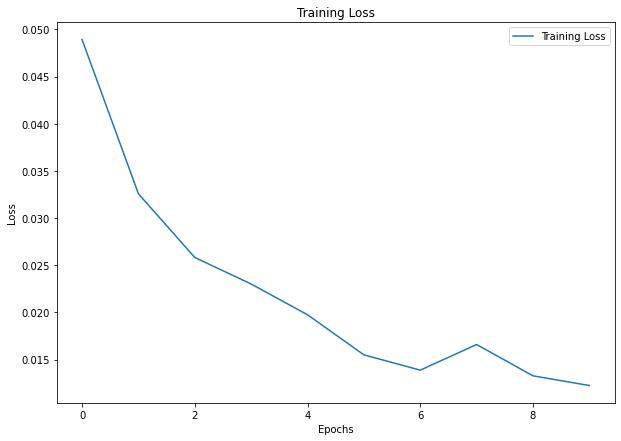

In [11]:
# Plot the training loss
plt.figure(figsize=(10, 7))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [12]:
# Set the model to evaluation mode
net.eval()

# Initialize variables to store correct and total predictions
correct = 0
total = 0

# Disable gradient computation for faster inference
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = net(images)
        
        # Get the predicted class with the highest score
        _, predicted = torch.max(outputs.data, 1)
        
        # Update correct and total counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Compute the test accuracy
test_accuracy = 100 * correct / total
print(f'Test accuracy: {test_accuracy:.2f}%')

Test accuracy: 96.85%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [13]:
from torch.optim import lr_scheduler

# Define a new model architecture (e.g., a simple CNN)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

# Create a new instance of the model
net = Net().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

# Training loop
num_epochs = 10
train_losses = []
val_losses = []
val_accs = []

for epoch in range(num_epochs):
    running_loss = 0.0
    
    # Training loop
    net.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 250 == 249:
            print(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 250:.3f}")
            running_loss = 0.0
    
    # Validation loop
    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_acc = 100 * correct / total
    train_losses.append(running_loss / len(train_loader))
    val_losses.append(val_loss / len(test_loader))
    val_accs.append(val_acc)
    
    print(f"Epoch {epoch + 1} average loss: {running_loss / len(train_loader):.3f}")
    print(f"Validation loss: {val_loss / len(test_loader):.3f}, Validation accuracy: {val_acc:.2f}%")

    # Step the learning rate scheduler
    scheduler.step()

print("Finished Training")

[1,   250] loss: 0.553
[1,   500] loss: 0.145
[1,   750] loss: 0.110
Epoch 1 average loss: 0.021
Validation loss: 0.051, Validation accuracy: 98.31%
[2,   250] loss: 0.086
[2,   500] loss: 0.075
[2,   750] loss: 0.064
Epoch 2 average loss: 0.013
Validation loss: 0.040, Validation accuracy: 98.75%
[3,   250] loss: 0.056
[3,   500] loss: 0.055
[3,   750] loss: 0.050
Epoch 3 average loss: 0.010
Validation loss: 0.033, Validation accuracy: 98.99%
[4,   250] loss: 0.045
[4,   500] loss: 0.047
[4,   750] loss: 0.043
Epoch 4 average loss: 0.009
Validation loss: 0.030, Validation accuracy: 99.08%
[5,   250] loss: 0.040
[5,   500] loss: 0.032
[5,   750] loss: 0.041
Epoch 5 average loss: 0.007
Validation loss: 0.035, Validation accuracy: 99.00%
[6,   250] loss: 0.027
[6,   500] loss: 0.018
[6,   750] loss: 0.018
Epoch 6 average loss: 0.004
Validation loss: 0.023, Validation accuracy: 99.39%
[7,   250] loss: 0.016
[7,   500] loss: 0.015
[7,   750] loss: 0.015
Epoch 7 average loss: 0.003
Validatio

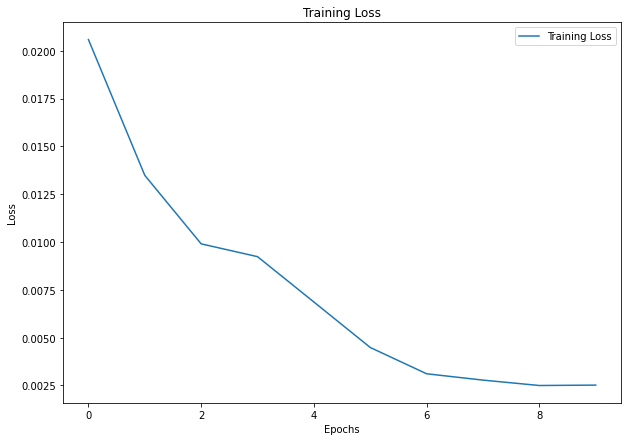

In [16]:
# Plot the training loss
plt.figure(figsize=(10, 7))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [14]:
# Test loop
net.eval()
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test loss: {test_loss / len(test_loader):.3f}')
print(f'Test accuracy: {test_accuracy:.2f}%')

Test loss: 0.023
Test accuracy: 99.39%


## Saving your model
Using `torch.save`, save your model for future loading.

In [15]:
# Get the current working directory
current_dir = os.getcwd()

# Construct the model path by joining the current directory and the filename
model_path = os.path.join(current_dir, 'model.pth')

# Save the model
torch.save(net.state_dict(), model_path)
print(f"Model saved to: {model_path}")

Model saved to: /workspace/home/model.pth
